<a href="https://colab.research.google.com/github/qianRaquel/PSPO/blob/main/PSPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/khalil-research/PyEPO.git

Cloning into 'PyEPO'...
remote: Enumerating objects: 16131, done.
remote: Counting objects: 100% (854/854), done.
remote: Compressing objects: 100% (570/570), done.
remote: Total 16131 (delta 364), reused 697 (delta 271), pack-reused 15277
Receiving objects: 100% (16131/16131), 279.02 MiB | 17.84 MiB/s, done.
Resolving deltas: 100% (6046/6046), done.


In [ ]:
!nvidia-smi

Sat Mar 11 07:51:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install PyEPO/pkg/.

In [ ]:
!pip install Auto-Sklearn

In [ ]:
# set work dir
import os
os.chdir("/content/PyEPO/pkg")

In [ ]:
import time
import random
import pyepo
import torch
from torch import nn
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
# fix random seed
random.seed(135)
np.random.seed(135)
torch.manual_seed(135)

In [ ]:
# map size
#k = 12
k = 18

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
if k==12:
  tmaps_train = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/train_maps.npy".format(k,k))
  tmaps_val = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/val_maps.npy".format(k,k))
  tmaps_test = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/test_maps.npy".format(k,k))
elif k==18:
  train_0=np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/train_maps_part0.npy".format(k,k))
  train_1=np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/train_maps_part1.npy".format(k,k))
  tmaps_train= np.append(train_0,train_1,axis=0)
  tmaps_val = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/val_maps.npy".format(k,k))
  tmaps_test = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/test_maps.npy".format(k,k))

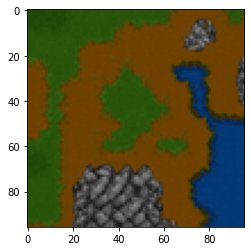

In [ ]:
plt.axis("on")
plt.imshow(tmaps_train[0])
plt.show()

In [ ]:
if k==12:
  costs_train = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/train_vertex_weights.npy".format(k,k))
  costs_val = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/val_vertex_weights.npy".format(k,k))
  costs_test = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/test_vertex_weights.npy".format(k,k))
elif k==18:
  costs_0 = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/train_vertex_weights_part0.npy".format(k,k))
  costs_1 = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/train_vertex_weights_part1.npy".format(k,k))
  costs_train =np.append(costs_0,costs_1,axis=0)
  costs_val = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/val_vertex_weights.npy".format(k,k))
  costs_test = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/test_vertex_weights.npy".format(k,k))

In [ ]:
costs_0.dtype

dtype('float16')

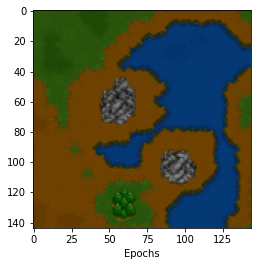

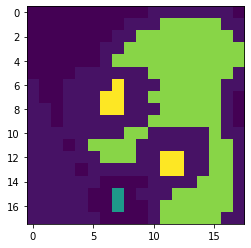

In [ ]:
i = 0
plt.axis("on")
plt.xlabel("Epochs", fontsize=10)
plt.imshow(tmaps_train[i])
plt.show()
plt.imshow(costs_train[i])


In [ ]:
if k==12:
  paths_train = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/train_shortest_paths.npy".format(k,k))
  paths_val = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/val_shortest_paths.npy".format(k,k))
  paths_test = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/test_shortest_paths.npy".format(k,k))
elif k==18:
  paths_0 = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/train_shortest_paths_part0.npy".format(k,k))
  paths_1 = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/train_shortest_paths_part1.npy".format(k,k))
  paths_train = np.append(paths_0,paths_1,axis=0)
  paths_val = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/val_shortest_paths.npy".format(k,k))
  paths_test = np.load("/content/drive/MyDrive/warcraft_shortest_path_oneskin/{}x{}/test_shortest_paths.npy".format(k,k))

In [ ]:
paths_train.shape

(10000, 18, 18)

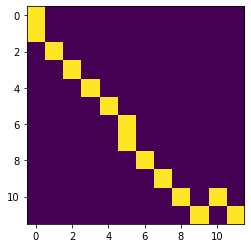

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=uint8)

In [ ]:
plt.axis("on")
plt.imshow(paths_train[0])
plt.show()
paths_train[0]

In [ ]:
paths_train[9999]


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
from torch.utils.data import Dataset
class mapDataset(Dataset):
    def __init__(self, tmaps, costs, paths):
        self.tmaps = tmaps
        self.costs = costs
        self.paths = paths
        self.objs = (costs * paths).sum(axis=(1,2)).reshape(-1,1)

    def __len__(self):
        return len(self.costs)

    def __getitem__(self, ind):
        return (
            torch.FloatTensor(self.tmaps[ind].transpose(2, 0, 1)/255).detach(), # image
            torch.FloatTensor(self.costs[ind]).reshape(-1),
            torch.FloatTensor(self.paths[ind]).reshape(-1),
            torch.FloatTensor(self.objs[ind]),
        )

In [ ]:
# datasets
dataset_train = mapDataset(tmaps_train, costs_train, paths_train)
dataset_val = mapDataset(tmaps_val, costs_val, paths_val)
dataset_test = mapDataset(tmaps_test, costs_test, paths_test)
# dataloader
from torch.utils.data import DataLoader
batch_size = 70
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

In [ ]:
tmaps_train.dtype

dtype('uint8')

In [ ]:
from torchvision.models import resnet18
nnet = resnet18(pretrained=False)
print(nnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
# build new ResNet18 with Max Pooling
class partialResNet(nn.Module):

    def __init__(self, k):
        super(partialResNet, self).__init__()
        # init resnet 18
        resnet = resnet18(pretrained=False)
        # first five layers of ResNet18
        self.conv1 = resnet.conv1
        self.bn = resnet.bn1
        self.relu = resnet.relu
        self.maxpool1 = resnet.maxpool
        self.block = resnet.layer1
        # conv to 1 channel
        self.conv2  = nn.Conv2d(64, 1, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1), bias=False)
        # max pooling
        self.maxpool2 = nn.AdaptiveMaxPool2d((k,k))

    def forward(self, x):
        h = self.conv1(x)
        h = self.bn(h)
        h = self.relu(h)
        h = self.maxpool1(h)
        h = self.block(h)
        h = self.conv2(h)
        out = self.maxpool2(h)
        # reshape for optmodel
        out = torch.squeeze(out, 1)
        out = out.reshape(out.shape[0], -1)
        return out

In [ ]:
import gurobipy as gp
params = {
"WLSACCESSID": '7e5d9258-7000-419f-b8f5-9bad474098bd',
"WLSSECRET": '76c3b767-4c49-4e67-8e88-86aacc4b373c',
"LICENSEID": 922845,
}
#env = gp.Env(params=params)
GLOBAL_VAR = gp.Env(params=params)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 922845
Academic license - for non-commercial use only - registered to ying0024@e.ntu.edu.sg


In [ ]:
from gurobipy import GRB

from pyepo.model.grb.grbmodel import optGrbModel

class shortestPathModel(optGrbModel):
    """
    This class is optimization model for shortest path problem on 2D grid with 8 neighbors

    Attributes:
        _model (GurobiPy model): Gurobi model
        grid (tuple of int): Size of grid network
        nodes (list): list of vertex
        edges (list): List of arcs
        nodes_map (ndarray): 2D array for node index
    """

    def __init__(self, grid):
        """
        Args:
            grid (tuple of int): size of grid network
        """
        self.grid = grid
        self.nodes, self.edges, self.nodes_map = self._getEdges()
        super().__init__()

    def _getEdges(self):
        """
        A method to get list of edges for grid network

        Returns:
            list: arcs
        """
        # init list
        nodes, edges = [], []
        # init map from coord to ind
        nodes_map = {}
        for i in range(self.grid[0]):
            for j in range(self.grid[1]):
                u = self._calNode(i, j)
                nodes_map[u] = (i,j)
                nodes.append(u)
                # edge to 8 neighbors
                # up
                if i != 0:
                    v = self._calNode(i-1, j)
                    edges.append((u,v))
                    # up-right
                    if j != self.grid[1] - 1:
                        v = self._calNode(i-1, j+1)
                        edges.append((u,v))
                # right
                if j != self.grid[1] - 1:
                    v = self._calNode(i, j+1)
                    edges.append((u,v))
                    # down-right
                    if i != self.grid[0] - 1:
                        v = self._calNode(i+1, j+1)
                        edges.append((u,v))
                # down
                if i != self.grid[0] - 1:
                    v = self._calNode(i+1, j)
                    edges.append((u,v))
                    # down-left
                    if j != 0:
                        v = self._calNode(i+1, j-1)
                        edges.append((u,v))
                # left
                if j != 0:
                    v = self._calNode(i, j-1)
                    edges.append((u,v))
                    # top-left
                    if i != 0:
                        v = self._calNode(i-1, j-1)
                        edges.append((u,v))
        return nodes, edges, nodes_map

    def _calNode(self, x, y):
        """
        A method to calculate index of node
        """
        v = x * self.grid[1] + y
        return v

    def _getModel(self):
        """
        A method to build Gurobi model

        Returns:
            tuple: optimization model and variables
        """
        global GLOBAL_VAR
        # ceate a model
        m = gp.Model("shortest path",GLOBAL_VAR)
        # varibles
        x = m.addVars(self.edges, ub=1, name="x")
        # sense
        m.modelSense = GRB.MINIMIZE
        # constraints
        for i in range(self.grid[0]):
            for j in range(self.grid[1]):
                v = self._calNode(i, j)
                expr = 0
                for e in self.edges:
                    # flow in
                    if v == e[1]:
                        expr += x[e]
                    # flow out
                    elif v == e[0]:
                        expr -= x[e]
                # source
                if i == 0 and j == 0:
                    m.addConstr(expr == -1)
                # sink
                elif i == self.grid[0] - 1 and j == self.grid[0] - 1:
                    m.addConstr(expr == 1)
                # transition
                else:
                    m.addConstr(expr == 0)
        return m, x

    def setObj(self, c):
        """
        A method to set objective function

        Args:
            c (np.ndarray): cost of objective function
        """
        # vector to matrix
        c = c.reshape(self.grid)
        # sum up vector cost
        obj = c[0,0] + gp.quicksum(c[self.nodes_map[j]] * self.x[i,j] for i, j in self.x)
        self._model.setObjective(obj)

    def solve(self):
        """
        A method to solve model

        Returns:
            tuple: optimal solution (list) and objective value (float)
        """
        # update gurobi model
        self._model.update()
        # solve
        self._model.optimize()

        # kxk solution map
        sol = np.zeros(self.grid)
        for i, j in self.edges:
            # active edge
            if abs(1 - self.x[i,j].x) < 1e-3:
                # node on active edge
                sol[self.nodes_map[i]] = 1
                sol[self.nodes_map[j]] = 1
        # matrix to vector
        sol = sol.reshape(-1)
        return sol, self._model.objVal

In [ ]:
# init model
grid = (k, k)
optmodel = shortestPathModel(grid)

Obj: 2.0
Path:


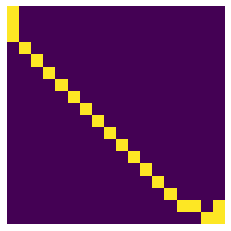

In [ ]:
# test
optmodel.setObj(costs_train[9999]) # assign cost
sol, obj = optmodel.solve() # solve
print("Obj: {}".format(obj))
print("Path:")
plt.axis("off")
plt.imshow(sol.reshape(k,k))
plt.show()

In [ ]:
import numpy as np
import torch
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pth', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score > self.best_score + self.delta:#for regret, the smaller the better
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation regret decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
def evaluate(nnet, optmodel, dataloader):
    # init data
    data = {"Regret":[], "Relative Regret":[], "Accuracy":[], "Optimal":[]}
    # eval
    nnet.eval()
    for x, c, w, z in tqdm(dataloader):
        # cuda
        if next(nnet.parameters()).is_cuda:
            x, c, w, z = x.cuda(), c.cuda(), w.cuda(), z.cuda()
        # predict
        cp = nnet(x)
        # to numpy
        c = c.to("cpu").detach().numpy()
        w = w.to("cpu").detach().numpy()
        z = z.to("cpu").detach().numpy()
        cp = cp.to("cpu").detach().numpy()
        # solve
        for i in range(cp.shape[0]):
            # sol for pred cost
            optmodel.setObj(cp[i])
            wpi, _ = optmodel.solve()
            # obj with true cost
            zpi = np.dot(wpi, c[i])
            # round
            zpi = zpi.round(1)
            zi = z[i,0].round(1)
            # regret
            regret = (zpi - zi).round(1)
            data["Regret"].append(regret)
            data["Relative Regret"].append(regret / zi)
            # accuracy
            data["Accuracy"].append((abs(wpi - w[i]) < 0.5).mean())
            # optimal
            data["Optimal"].append(abs(regret) < 1e-5)
    # dataframe
    df = pd.DataFrame.from_dict(data)
    # print
    time.sleep(1)
    print("Avg Regret: {:.4f}".format(df["Regret"].mean()))
    print("Avg Rel Regret: {:.2f}%".format(df["Relative Regret"].mean()*100))
    print("Path Accuracy: {:.2f}%".format(df["Accuracy"].mean()*100))
    print("Optimality Ratio: {:.2f}%".format(df["Optimal"].mean()*100))
    return df

In [ ]:
def plotLearningCurve(loss_log, regret_log):
    # draw loss during training
    plt.figure(figsize=(8, 4))
    plt.plot(loss_log, color="c")
    plt.xticks(fontsize=10)
    #yticks = [0.5,1,5]
    plt.yticks(fontsize=10)
    plt.xlim(-epoch/50, epochs+epoch/50)
    plt.ylim(0, max(loss_log[:])*1.1)
    #plt.ylim(0,5)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.title("Learning Curve on Training Set", fontsize=12)
    plt.show()
    # draw normalized regret on test
    plt.figure(figsize=(8, 4))
    plt.plot([i*log_step for i in range(len(regret_log))], regret_log, color="royalblue")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(-epoch/50, epochs+epoch/50)
    plt.ylim(0, max(regret_log[1:])*1.1)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Normalized Regret", fontsize=12)
    plt.title("Learning Curve on Validation Set", fontsize=12)
    plt.show()

In [ ]:
# number of epochs
epochs = 50
# learning rate
lr = 5e-4
# log step
log_step = 1

In [ ]:
# init net
nnet = partialResNet(k=18)#k is equal to map size
# cuda
if torch.cuda.is_available():
    nnet = nnet.cuda()
# set optimizer
optimizer = torch.optim.Adam(nnet.parameters(), lr=lr)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
from torchsummary import summary
summary(nnet,(3,96,96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 48, 48]           9,408
       BatchNorm2d-2           [-1, 64, 48, 48]             128
              ReLU-3           [-1, 64, 48, 48]               0
         MaxPool2d-4           [-1, 64, 24, 24]               0
            Conv2d-5           [-1, 64, 24, 24]          36,864
       BatchNorm2d-6           [-1, 64, 24, 24]             128
              ReLU-7           [-1, 64, 24, 24]               0
            Conv2d-8           [-1, 64, 24, 24]          36,864
       BatchNorm2d-9           [-1, 64, 24, 24]             128
             ReLU-10           [-1, 64, 24, 24]               0
       BasicBlock-11           [-1, 64, 24, 24]               0
           Conv2d-12           [-1, 64, 24, 24]          36,864
      BatchNorm2d-13           [-1, 64, 24, 24]             128
             ReLU-14           [-1, 64,

# Two Stages

In [ ]:
# set loss
mseloss = nn.MSELoss()

In [ ]:
# set stopper
#stopper = earlyStopper(patience=7)
early_stopping = EarlyStopping(patience=50,delta=0,verbose=True,path='/content/drive/MyDrive/PSPO/18/TS.pth')
# train
loss_log1, regret_log1 = [], [pyepo.metric.regret(nnet, optmodel, loader_val)]
tbar = tqdm(range(epochs))
for epoch in tbar:
    nnet.train()
    train_loss=0
    batch_idx=0
    for x, c, w, z in loader_train:
        # cuda
        if torch.cuda.is_available():
            x, c, w, z = x.cuda(), c.cuda(), w.cuda(), z.cuda()
        # forward pass
        cp = nnet(x) # predicted cost
        loss = mseloss(cp, c) # loss
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # log
        tbar.set_description("Epoch: {:2}, Loss: {:3.4f}".format(epoch,loss.item()))
        train_loss += loss.item()
        batch_idx+=1
    loss_log1.append(train_loss/batch_idx)

    # scheduled learning rate
    if (epoch == int(epochs*0.6)) or (epoch == int(epochs*0.8)):
        for g in optimizer.param_groups:
            g['lr'] /= 10
    if epoch % log_step == 0:
        # log regret
        regret = pyepo.metric.regret(nnet, optmodel, loader_val) # regret on val
        regret_log1.append(regret)
        # early stop
        #regret = pyepo.metric.regret(nnet, optmodel, loader_val) # regret on val
        early_stopping(regret,nnet)
        if early_stopping.early_stop:
        #print("Early stopping")
          break
        #if stopper.stop(regret):
            #break

Epoch:  1, Loss: 0.6544:   2%|▏         | 1/50 [01:24<1:09:11, 84.73s/it]

Validation regret decreased (inf --> 0.032019).  Saving model ...


Epoch:  2, Loss: 0.4977:   4%|▍         | 2/50 [02:49<1:07:45, 84.70s/it]

Validation regret decreased (0.032019 --> 0.018145).  Saving model ...


Epoch:  3, Loss: 0.4411:   6%|▌         | 3/50 [04:13<1:06:13, 84.54s/it]

Validation regret decreased (0.018145 --> 0.015698).  Saving model ...


Epoch:  4, Loss: 0.4454:   8%|▊         | 4/50 [05:37<1:04:31, 84.16s/it]

Validation regret decreased (0.015698 --> 0.013761).  Saving model ...


Epoch:  5, Loss: 0.4105:  10%|█         | 5/50 [07:01<1:03:12, 84.29s/it]

Validation regret decreased (0.013761 --> 0.011966).  Saving model ...


Epoch:  6, Loss: 0.4747:  12%|█▏        | 6/50 [08:26<1:01:55, 84.44s/it]

Validation regret decreased (0.011966 --> 0.010869).  Saving model ...


Epoch:  7, Loss: 0.4294:  14%|█▍        | 7/50 [09:49<1:00:11, 83.98s/it]

Validation regret decreased (0.010869 --> 0.010359).  Saving model ...


Epoch:  8, Loss: 0.4522:  16%|█▌        | 8/50 [11:11<58:23, 83.42s/it]

Validation regret decreased (0.010359 --> 0.010304).  Saving model ...


Epoch:  9, Loss: 0.5275:  18%|█▊        | 9/50 [12:33<56:30, 82.69s/it]

Validation regret decreased (0.010304 --> 0.009450).  Saving model ...


Epoch: 10, Loss: 0.4177:  20%|██        | 10/50 [13:54<54:47, 82.20s/it]

Validation regret decreased (0.009450 --> 0.009195).  Saving model ...


Epoch: 11, Loss: 0.3977:  22%|██▏       | 11/50 [15:15<53:11, 81.84s/it]

Validation regret decreased (0.009195 --> 0.009117).  Saving model ...


Epoch: 12, Loss: 0.4421:  24%|██▍       | 12/50 [16:36<51:38, 81.54s/it]

EarlyStopping counter: 1 out of 50


Epoch: 13, Loss: 0.3343:  26%|██▌       | 13/50 [17:59<50:37, 82.10s/it]

EarlyStopping counter: 2 out of 50


Epoch: 14, Loss: 0.3194:  28%|██▊       | 14/50 [19:21<49:18, 82.19s/it]

Validation regret decreased (0.009117 --> 0.008584).  Saving model ...


Epoch: 15, Loss: 0.3913:  30%|███       | 15/50 [20:45<48:09, 82.54s/it]

Validation regret decreased (0.008584 --> 0.008573).  Saving model ...


Epoch: 16, Loss: 0.3641:  32%|███▏      | 16/50 [22:08<46:57, 82.87s/it]

Validation regret decreased (0.008573 --> 0.008104).  Saving model ...


Epoch: 17, Loss: 0.3667:  34%|███▍      | 17/50 [23:32<45:38, 82.98s/it]

EarlyStopping counter: 1 out of 50


Epoch: 18, Loss: 0.3477:  36%|███▌      | 18/50 [24:55<44:19, 83.12s/it]

Validation regret decreased (0.008104 --> 0.007980).  Saving model ...


Epoch: 19, Loss: 0.3384:  38%|███▊      | 19/50 [26:18<42:57, 83.14s/it]

EarlyStopping counter: 1 out of 50


Epoch: 20, Loss: 0.3634:  40%|████      | 20/50 [27:41<41:31, 83.06s/it]

Validation regret decreased (0.007980 --> 0.007729).  Saving model ...


Epoch: 21, Loss: 0.3199:  42%|████▏     | 21/50 [29:06<40:24, 83.59s/it]

EarlyStopping counter: 1 out of 50


Epoch: 22, Loss: 0.3283:  44%|████▍     | 22/50 [30:30<39:01, 83.61s/it]

Validation regret decreased (0.007729 --> 0.007462).  Saving model ...


Epoch: 23, Loss: 0.3639:  46%|████▌     | 23/50 [31:52<37:31, 83.39s/it]

Validation regret decreased (0.007462 --> 0.007314).  Saving model ...


Epoch: 24, Loss: 0.3092:  48%|████▊     | 24/50 [33:15<36:03, 83.21s/it]

EarlyStopping counter: 1 out of 50


Epoch: 25, Loss: 0.3234:  50%|█████     | 25/50 [34:38<34:36, 83.05s/it]

EarlyStopping counter: 2 out of 50


Epoch: 26, Loss: 0.3091:  52%|█████▏    | 26/50 [36:01<33:13, 83.08s/it]

EarlyStopping counter: 3 out of 50


Epoch: 27, Loss: 0.2768:  54%|█████▍    | 27/50 [37:24<31:52, 83.15s/it]

EarlyStopping counter: 4 out of 50


Epoch: 28, Loss: 0.2793:  56%|█████▌    | 28/50 [38:48<30:32, 83.31s/it]

Validation regret decreased (0.007314 --> 0.006581).  Saving model ...


Epoch: 29, Loss: 0.2879:  58%|█████▊    | 29/50 [40:13<29:19, 83.80s/it]

EarlyStopping counter: 1 out of 50


Epoch: 30, Loss: 0.3015:  60%|██████    | 30/50 [41:38<28:04, 84.20s/it]

EarlyStopping counter: 2 out of 50


Epoch: 31, Loss: 0.3468:  62%|██████▏   | 31/50 [43:04<26:47, 84.63s/it]

EarlyStopping counter: 3 out of 50


Epoch: 32, Loss: 0.3022:  64%|██████▍   | 32/50 [44:29<25:24, 84.72s/it]

EarlyStopping counter: 4 out of 50


Epoch: 33, Loss: 0.3123:  66%|██████▌   | 33/50 [45:53<23:56, 84.50s/it]

EarlyStopping counter: 5 out of 50


Epoch: 34, Loss: 0.3114:  68%|██████▊   | 34/50 [47:17<22:31, 84.49s/it]

Validation regret decreased (0.006581 --> 0.006486).  Saving model ...


Epoch: 35, Loss: 0.3088:  70%|███████   | 35/50 [48:41<21:04, 84.29s/it]

EarlyStopping counter: 1 out of 50


Epoch: 36, Loss: 0.2473:  72%|███████▏  | 36/50 [50:05<19:40, 84.32s/it]

EarlyStopping counter: 2 out of 50


Epoch: 37, Loss: 0.3021:  74%|███████▍  | 37/50 [51:30<18:16, 84.36s/it]

EarlyStopping counter: 3 out of 50


Epoch: 38, Loss: 0.3144:  76%|███████▌  | 38/50 [52:56<16:57, 84.82s/it]

Validation regret decreased (0.006486 --> 0.006452).  Saving model ...


Epoch: 39, Loss: 0.2855:  78%|███████▊  | 39/50 [54:20<15:29, 84.54s/it]

EarlyStopping counter: 1 out of 50


Epoch: 40, Loss: 0.2954:  80%|████████  | 40/50 [55:43<14:02, 84.23s/it]

EarlyStopping counter: 2 out of 50


Epoch: 41, Loss: 0.2919:  82%|████████▏ | 41/50 [57:08<12:39, 84.39s/it]

EarlyStopping counter: 3 out of 50


Epoch: 42, Loss: 0.2883:  84%|████████▍ | 42/50 [58:33<11:17, 84.64s/it]

EarlyStopping counter: 4 out of 50


Epoch: 43, Loss: 0.2420:  86%|████████▌ | 43/50 [59:58<09:52, 84.59s/it]

EarlyStopping counter: 5 out of 50


Epoch: 44, Loss: 0.2750:  88%|████████▊ | 44/50 [1:01:21<08:26, 84.38s/it]

EarlyStopping counter: 6 out of 50


Epoch: 45, Loss: 0.2738:  90%|█████████ | 45/50 [1:02:46<07:01, 84.35s/it]

EarlyStopping counter: 7 out of 50


Epoch: 46, Loss: 0.2778:  92%|█████████▏| 46/50 [1:04:10<05:37, 84.29s/it]

EarlyStopping counter: 8 out of 50


Epoch: 47, Loss: 0.2745:  94%|█████████▍| 47/50 [1:05:33<04:12, 84.08s/it]

Validation regret decreased (0.006452 --> 0.006422).  Saving model ...


Epoch: 48, Loss: 0.2678:  96%|█████████▌| 48/50 [1:06:59<02:48, 84.42s/it]

EarlyStopping counter: 1 out of 50


Epoch: 49, Loss: 0.2566:  98%|█████████▊| 49/50 [1:08:25<01:24, 84.88s/it]

EarlyStopping counter: 2 out of 50


Epoch: 49, Loss: 0.2389: 100%|██████████| 50/50 [1:09:50<00:00, 83.81s/it]

EarlyStopping counter: 3 out of 50


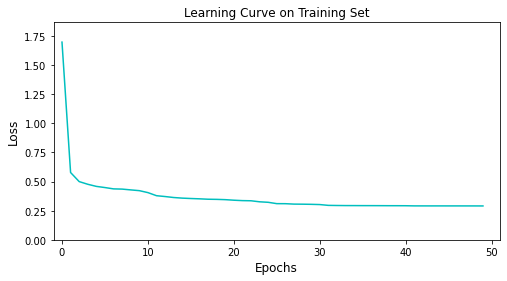

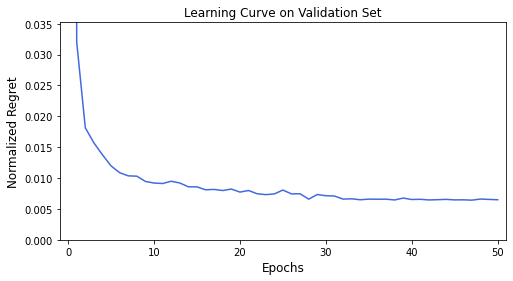

Test set:


100%|██████████| 15/15 [01:12<00:00,  4.80s/it]


Avg Regret: 0.2104
Avg Rel Regret: 0.71%
Path Accuracy: 95.19%
Optimality Ratio: 75.90%


In [ ]:
# plot
plotLearningCurve(loss_log1, regret_log1)
np.savetxt("/content/drive/MyDrive/PSPO/18/TS_loss_log1.csv", np.array(loss_log1))
np.savetxt("/content/drive/MyDrive/PSPO/18/TS_regret_log1.csv", np.array(regret_log1))
# eval
nnet.load_state_dict(torch.load('/content/drive/MyDrive/PSPO/18/TS.pth'))
print("Test set:")
df1 = evaluate(nnet, optmodel, loader_test)
df1.to_csv("/content/drive/MyDrive/PSPO/18/TS_evaluate.csv")

# SPO

In [ ]:
# init net
nnet = partialResNet(k=18)
# cuda
if torch.cuda.is_available():
    nnet = nnet.cuda()
#load parameters from mse
#checkpoint = torch.load('/content/drive/MyDrive/nnet_pyepo_mse_k=30_10000.pth')
#nnet.load_state_dict(checkpoint['net'])
# set optimizer
optimizer = torch.optim.Adam(nnet.parameters(), lr=lr)
# set stopper
early_stopping = EarlyStopping(patience=50,delta=0, verbose=True,path='/content/drive/MyDrive/PSPO/18/SPO.pth')
# set loss
spoploss = pyepo.func.SPOPlus(optmodel, processes=1)

Num of cores: 1


In [ ]:
# train
#train_loss_list=[]
loss_log2, regret_log2 = [], [pyepo.metric.regret(nnet, optmodel, loader_val)]
tbar = tqdm(range(epochs))
for epoch in tbar:
    nnet.train()
    train_loss=0
    batch_idx=0
    for x, c, w, z in loader_train:
        # cuda
        if torch.cuda.is_available():
            x, c, w, z = x.cuda(), c.cuda(), w.cuda(), z.cuda()
        # forward pass
        cp = nnet(x) # predicted cost
        loss = spoploss(cp, c, w, z).mean() # loss
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # log loss
        tbar.set_description("Epoch: {:2}, Loss: {:3.4f}".format(epoch, loss.item()))
        train_loss+=loss.item()
        batch_idx+=1
    loss_log2.append(train_loss/batch_idx)
    #tbar.set_description("Epoch: {:2}, Loss: {:3.4f}".format(epoch, train_loss/batch_idx))
    #train_loss_list.append(train_loss/(batch_idx+1))
    # scheduled learning rate
    if (epoch == int(epochs*0.6)) or (epoch == int(epochs*0.8)):
        for g in optimizer.param_groups:
            g['lr'] /= 10
    if epoch % log_step == 0:
        # log regret
        regret = pyepo.metric.regret(nnet, optmodel, loader_val) # regret on val
        regret_log2.append(regret)
        # early stop
        #regret = pyepo.metric.regret(nnet, optmodel, loader_val) # regret on val
        early_stopping(regret,nnet)
        if early_stopping.early_stop:
          print("Early stopping")
          break
    #if epoch==24:
      #plotLearningCurve(loss_log3, regret_log3)
      # eval
      #print("Test set:")
      #df2 = evaluate(nnet, optmodel, loader_test)
    #gc.collect()

Epoch:  0, Loss: 12.5527:   2%|▏         | 1/50 [13:24<10:56:59, 804.48s/it]

Validation regret decreased (inf --> 0.042641).  Saving model ...


Epoch:  1, Loss: 8.4202:   4%|▍         | 2/50 [26:49<10:43:36, 804.52s/it]

Validation regret decreased (0.042641 --> 0.024113).  Saving model ...


Epoch:  2, Loss: 6.2194:   6%|▌         | 3/50 [40:11<10:29:26, 803.54s/it]

Validation regret decreased (0.024113 --> 0.018728).  Saving model ...


Epoch:  3, Loss: 6.8527:   8%|▊         | 4/50 [53:29<10:14:20, 801.31s/it]

Validation regret decreased (0.018728 --> 0.016261).  Saving model ...


Epoch:  4, Loss: 3.9757:  10%|█         | 5/50 [1:06:42<9:58:47, 798.38s/it] 

Validation regret decreased (0.016261 --> 0.013798).  Saving model ...


Epoch:  5, Loss: 4.6425:  12%|█▏        | 6/50 [1:19:50<9:42:57, 794.94s/it]

Validation regret decreased (0.013798 --> 0.012281).  Saving model ...


Epoch:  6, Loss: 3.5630:  14%|█▍        | 7/50 [1:32:59<9:28:16, 792.94s/it]

Validation regret decreased (0.012281 --> 0.011714).  Saving model ...


Epoch:  7, Loss: 4.4190:  16%|█▌        | 8/50 [1:46:00<9:12:17, 788.99s/it]

Validation regret decreased (0.011714 --> 0.010993).  Saving model ...


Epoch:  8, Loss: 4.0047:  18%|█▊        | 9/50 [1:58:59<8:57:06, 786.01s/it]

EarlyStopping counter: 1 out of 50


Epoch:  9, Loss: 5.0511:  20%|██        | 10/50 [2:11:54<8:41:45, 782.63s/it]

Validation regret decreased (0.010993 --> 0.010813).  Saving model ...


Epoch: 10, Loss: 3.6831:  22%|██▏       | 11/50 [2:24:36<8:24:33, 776.25s/it]

Validation regret decreased (0.010813 --> 0.010197).  Saving model ...


Epoch: 11, Loss: 3.2047:  24%|██▍       | 12/50 [2:37:03<8:05:59, 767.35s/it]

Validation regret decreased (0.010197 --> 0.009121).  Saving model ...


Epoch: 12, Loss: 3.8467:  26%|██▌       | 13/50 [2:49:28<7:49:04, 760.65s/it]

EarlyStopping counter: 1 out of 50


Epoch: 13, Loss: 3.0461:  28%|██▊       | 14/50 [3:01:55<7:33:52, 756.45s/it]

EarlyStopping counter: 2 out of 50


Epoch: 14, Loss: 2.7237:  30%|███       | 15/50 [3:14:22<7:19:35, 753.58s/it]

Validation regret decreased (0.009121 --> 0.008677).  Saving model ...


Epoch: 15, Loss: 3.2679:  32%|███▏      | 16/50 [3:26:49<7:05:59, 751.75s/it]

EarlyStopping counter: 1 out of 50


Epoch: 16, Loss: 2.5416:  34%|███▍      | 17/50 [3:39:16<6:52:40, 750.32s/it]

Validation regret decreased (0.008677 --> 0.008061).  Saving model ...


Epoch: 17, Loss: 2.6816:  36%|███▌      | 18/50 [3:51:47<6:40:12, 750.40s/it]

Validation regret decreased (0.008061 --> 0.007884).  Saving model ...


Epoch: 18, Loss: 3.4125:  38%|███▊      | 19/50 [4:04:13<6:27:03, 749.15s/it]

EarlyStopping counter: 1 out of 50


Epoch: 19, Loss: 4.0004:  40%|████      | 20/50 [4:16:40<6:14:11, 748.40s/it]

Validation regret decreased (0.007884 --> 0.007724).  Saving model ...


Epoch: 20, Loss: 3.2484:  42%|████▏     | 21/50 [4:29:03<6:01:02, 746.99s/it]

EarlyStopping counter: 1 out of 50


Epoch: 21, Loss: 2.2863:  44%|████▍     | 22/50 [4:41:26<5:48:02, 745.80s/it]

EarlyStopping counter: 2 out of 50


Epoch: 22, Loss: 2.2730:  46%|████▌     | 23/50 [4:53:50<5:35:16, 745.04s/it]

EarlyStopping counter: 3 out of 50


Epoch: 23, Loss: 2.9766:  48%|████▊     | 24/50 [5:06:13<5:22:40, 744.63s/it]

EarlyStopping counter: 4 out of 50


Epoch: 24, Loss: 3.8858:  50%|█████     | 25/50 [5:18:38<5:10:12, 744.51s/it]

EarlyStopping counter: 5 out of 50


Epoch: 25, Loss: 2.2306:  52%|█████▏    | 26/50 [5:31:02<4:57:46, 744.42s/it]

EarlyStopping counter: 6 out of 50


Epoch: 26, Loss: 3.2318:  54%|█████▍    | 27/50 [5:43:27<4:45:23, 744.49s/it]

Validation regret decreased (0.007724 --> 0.007643).  Saving model ...


Epoch: 27, Loss: 3.3995:  56%|█████▌    | 28/50 [5:55:51<4:32:58, 744.46s/it]

Validation regret decreased (0.007643 --> 0.007518).  Saving model ...


Epoch: 28, Loss: 2.4822:  58%|█████▊    | 29/50 [6:08:14<4:20:23, 743.98s/it]

Validation regret decreased (0.007518 --> 0.007129).  Saving model ...


Epoch: 29, Loss: 3.4279:  60%|██████    | 30/50 [6:20:37<4:07:53, 743.68s/it]

EarlyStopping counter: 1 out of 50


Epoch: 30, Loss: 2.5146:  62%|██████▏   | 31/50 [6:33:01<3:55:34, 743.91s/it]

EarlyStopping counter: 2 out of 50


Epoch: 31, Loss: 2.3855:  64%|██████▍   | 32/50 [6:45:24<3:43:03, 743.53s/it]

Validation regret decreased (0.007129 --> 0.006527).  Saving model ...


Epoch: 32, Loss: 2.4991:  66%|██████▌   | 33/50 [6:57:45<3:30:28, 742.86s/it]

EarlyStopping counter: 1 out of 50


Epoch: 33, Loss: 2.0377:  68%|██████▊   | 34/50 [7:10:38<3:20:28, 751.80s/it]

EarlyStopping counter: 2 out of 50


Epoch: 34, Loss: 2.6244:  70%|███████   | 35/50 [7:23:34<3:09:47, 759.16s/it]

EarlyStopping counter: 3 out of 50


Epoch: 35, Loss: 2.6347:  72%|███████▏  | 36/50 [7:36:29<2:58:13, 763.82s/it]

EarlyStopping counter: 4 out of 50


Epoch: 36, Loss: 2.6752:  74%|███████▍  | 37/50 [7:49:26<2:46:20, 767.75s/it]

EarlyStopping counter: 5 out of 50


Epoch: 37, Loss: 2.2358:  76%|███████▌  | 38/50 [8:02:26<2:34:19, 771.61s/it]

EarlyStopping counter: 6 out of 50


Epoch: 38, Loss: 2.3414:  78%|███████▊  | 39/50 [8:15:10<2:21:01, 769.22s/it]

EarlyStopping counter: 7 out of 50


Epoch: 39, Loss: 3.9432:  80%|████████  | 40/50 [8:27:58<2:08:07, 768.77s/it]

EarlyStopping counter: 8 out of 50


Epoch: 40, Loss: 1.9309:  82%|████████▏ | 41/50 [8:40:56<1:55:43, 771.53s/it]

EarlyStopping counter: 9 out of 50


Epoch: 41, Loss: 1.6442:  84%|████████▍ | 42/50 [8:53:47<1:42:50, 771.33s/it]

EarlyStopping counter: 10 out of 50


Epoch: 42, Loss: 2.7038:  86%|████████▌ | 43/50 [9:06:37<1:29:56, 770.93s/it]

EarlyStopping counter: 11 out of 50


Epoch: 43, Loss: 2.5699:  88%|████████▊ | 44/50 [9:19:30<1:17:09, 771.57s/it]

EarlyStopping counter: 12 out of 50


Epoch: 44, Loss: 1.6890:  90%|█████████ | 45/50 [9:32:18<1:04:13, 770.64s/it]

EarlyStopping counter: 13 out of 50


Epoch: 45, Loss: 1.6784:  92%|█████████▏| 46/50 [9:44:59<51:10, 767.59s/it]  

EarlyStopping counter: 14 out of 50


Epoch: 46, Loss: 3.9526:  94%|█████████▍| 47/50 [9:57:47<38:23, 767.76s/it]

EarlyStopping counter: 15 out of 50


Epoch: 47, Loss: 1.6969:  96%|█████████▌| 48/50 [10:10:29<25:32, 766.22s/it]

EarlyStopping counter: 16 out of 50


Epoch: 48, Loss: 1.9595:  98%|█████████▊| 49/50 [10:23:14<12:45, 765.86s/it]

EarlyStopping counter: 17 out of 50


Epoch: 49, Loss: 1.7310: 100%|██████████| 50/50 [10:35:53<00:00, 763.07s/it]

EarlyStopping counter: 18 out of 50


In [ ]:
torch.save(nnet.state_dict(), '/content/drive/MyDrive/PSPO/18/SPO.pth')

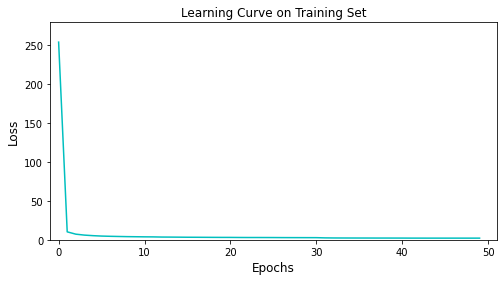

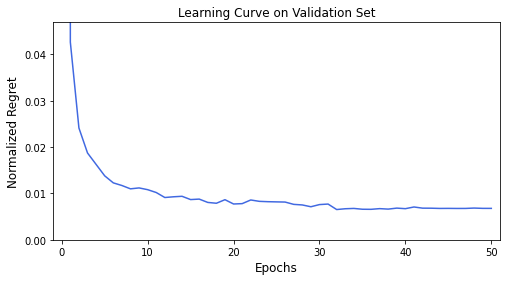

Test set:


100%|██████████| 15/15 [01:08<00:00,  4.54s/it]


Avg Regret: 0.2467
Avg Rel Regret: 0.81%
Path Accuracy: 97.35%
Optimality Ratio: 71.90%


'\n# plot\nplotLearningCurve(loss_log3, regret_log3)\n# eval\nprint("Test set:")\ndf3 = evaluate(nnet, optmodel, loader_test)'

In [ ]:
# plot
plotLearningCurve(loss_log2, regret_log2)
np.savetxt("/content/drive/MyDrive/PSPO/18/SPO_loss_log2.csv", np.array(loss_log2))
np.savetxt("/content/drive/MyDrive/PSPO/18/SPO_regret_log2.csv", np.array(regret_log2))
# eval
nnet.load_state_dict(torch.load('/content/drive/MyDrive/PSPO/18/SPO.pth'))
print("Test set:")
df2 = evaluate(nnet, optmodel, loader_test)
df2.to_csv("/content/drive/MyDrive/PSPO/18/SPO_evaluate.csv")

'''
# plot
plotLearningCurve(loss_log3, regret_log3)
# eval
print("Test set:")
df3 = evaluate(nnet, optmodel, loader_test)'''

# PSPO

In [ ]:
# init net
nnet = partialResNet(k=18)
# cuda
if torch.cuda.is_available():
    nnet = nnet.cuda()
#load parameters from pretrain model
nnet.load_state_dict(torch.load('/content/drive/MyDrive/PSPO/18/TS.pth'))
# set optimizer
optimizer = torch.optim.Adam(nnet.parameters(), lr=lr)
# set stopper
early_stopping = EarlyStopping(patience=7,delta=0, verbose=True,path='/content/drive/MyDrive/PSPO/18/PSPO.pth')
# set loss
spoploss = pyepo.func.SPOPlus(optmodel, processes=1)

Num of cores: 1


In [ ]:
# train
#train_loss_list=[]
loss_log3, regret_log3 = [], [pyepo.metric.regret(nnet, optmodel, loader_val)]
tbar = tqdm(range(epochs))
for epoch in tbar:
    nnet.train()
    train_loss=0
    batch_idx=0
    for x, c, w, z in loader_train:
        # cuda
        if torch.cuda.is_available():
            x, c, w, z = x.cuda(), c.cuda(), w.cuda(), z.cuda()
        # forward pass
        cp = nnet(x) # predicted cost
        loss = spoploss(cp, c, w, z).mean() # loss
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # log loss
        tbar.set_description("Epoch: {:2}, Loss: {:3.4f}".format(epoch, loss.item()))
        train_loss+=loss.item()
        batch_idx+=1
# plot
    loss_log3.append(train_loss/batch_idx)

    #train_loss_list.append(train_loss/(batch_idx+1))
    # scheduled learning rate
    if (epoch == int(epochs*0.6)) or (epoch == int(epochs*0.8)):
        for g in optimizer.param_groups:
            g['lr'] /= 10
    if epoch % log_step == 0:
        # log regret
        regret = pyepo.metric.regret(nnet, optmodel, loader_val) # regret on val
        regret_log3.append(regret)
        # early stop
        #regret = pyepo.metric.regret(nnet, optmodel, loader_val) # regret on val
        early_stopping(regret,nnet)
        if early_stopping.early_stop:
          print("Early stopping")
          break
    if epoch==24:
      #plotLearningCurve(loss_log3, regret_log3)
      # eval
      print("Test set:")
      df3 = evaluate(nnet, optmodel, loader_test)
    #gc.collect()

Epoch:  0, Loss: 3.0241:   2%|▏         | 1/50 [13:17<10:50:59, 797.13s/it]

Validation regret decreased (inf --> 0.006619).  Saving model ...


Epoch:  1, Loss: 3.1481:   4%|▍         | 2/50 [26:11<10:26:56, 783.69s/it]

Validation regret decreased (0.006619 --> 0.006020).  Saving model ...


Epoch:  2, Loss: 1.8673:   6%|▌         | 3/50 [39:17<10:14:39, 784.68s/it]

Validation regret decreased (0.006020 --> 0.005709).  Saving model ...


Epoch:  3, Loss: 2.0445:   8%|▊         | 4/50 [52:25<10:02:33, 785.94s/it]

EarlyStopping counter: 1 out of 7


Epoch:  4, Loss: 2.2410:  10%|█         | 5/50 [1:05:53<9:55:29, 794.00s/it] 

Validation regret decreased (0.005709 --> 0.005506).  Saving model ...


Epoch:  5, Loss: 1.5035:  12%|█▏        | 6/50 [1:19:02<9:41:03, 792.34s/it]

Validation regret decreased (0.005506 --> 0.004854).  Saving model ...


Epoch:  6, Loss: 1.7881:  14%|█▍        | 7/50 [1:32:04<9:25:18, 788.79s/it]

EarlyStopping counter: 1 out of 7


Epoch:  7, Loss: 2.2770:  16%|█▌        | 8/50 [1:45:05<9:10:29, 786.41s/it]

EarlyStopping counter: 2 out of 7


Epoch:  8, Loss: 1.7393:  18%|█▊        | 9/50 [1:58:04<8:55:50, 784.16s/it]

EarlyStopping counter: 3 out of 7


Epoch:  9, Loss: 1.6738:  20%|██        | 10/50 [2:11:07<8:42:32, 783.81s/it]

Validation regret decreased (0.004854 --> 0.004582).  Saving model ...


Epoch: 10, Loss: 2.7906:  22%|██▏       | 11/50 [2:24:05<8:28:19, 782.04s/it]

EarlyStopping counter: 1 out of 7


Epoch: 11, Loss: 1.3149:  24%|██▍       | 12/50 [2:37:01<8:14:05, 780.16s/it]

EarlyStopping counter: 2 out of 7


Epoch: 12, Loss: 1.0707:  26%|██▌       | 13/50 [2:50:01<8:01:02, 780.05s/it]

EarlyStopping counter: 3 out of 7


Epoch: 13, Loss: 1.9151:  28%|██▊       | 14/50 [3:03:00<7:47:54, 779.85s/it]

EarlyStopping counter: 4 out of 7


Epoch: 14, Loss: 2.1516:  30%|███       | 15/50 [3:16:02<7:35:15, 780.45s/it]

EarlyStopping counter: 5 out of 7


Epoch: 15, Loss: 1.8783:  32%|███▏      | 16/50 [3:29:01<7:22:01, 780.05s/it]

Validation regret decreased (0.004582 --> 0.004517).  Saving model ...


Epoch: 16, Loss: 1.3370:  34%|███▍      | 17/50 [3:41:50<7:07:14, 776.79s/it]

Validation regret decreased (0.004517 --> 0.004192).  Saving model ...


Epoch: 17, Loss: 1.3613:  36%|███▌      | 18/50 [3:54:45<6:53:54, 776.09s/it]

EarlyStopping counter: 1 out of 7


Epoch: 18, Loss: 2.4733:  38%|███▊      | 19/50 [4:07:38<6:40:34, 775.30s/it]

EarlyStopping counter: 2 out of 7


Epoch: 19, Loss: 1.7366:  40%|████      | 20/50 [4:20:33<6:27:35, 775.17s/it]

EarlyStopping counter: 3 out of 7


Epoch: 20, Loss: 2.1076:  42%|████▏     | 21/50 [4:33:27<6:14:32, 774.92s/it]

EarlyStopping counter: 4 out of 7


Epoch: 21, Loss: 1.4484:  44%|████▍     | 22/50 [4:46:20<6:01:20, 774.29s/it]

EarlyStopping counter: 5 out of 7


Epoch: 22, Loss: 1.0907:  46%|████▌     | 23/50 [4:59:30<5:50:30, 778.90s/it]

EarlyStopping counter: 6 out of 7


Epoch: 23, Loss: 1.7466:  46%|████▌     | 23/50 [5:12:35<6:06:57, 815.47s/it]

EarlyStopping counter: 7 out of 7
Early stopping


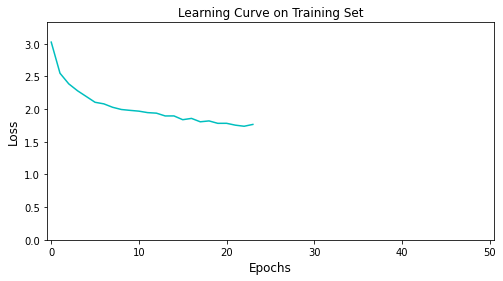

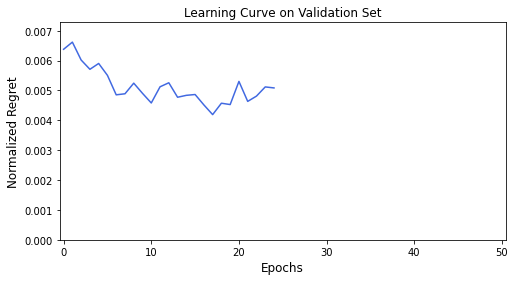

Test set:


100%|██████████| 15/15 [01:09<00:00,  4.61s/it]


Avg Regret: 0.1446
Avg Rel Regret: 0.46%
Path Accuracy: 97.73%
Optimality Ratio: 81.10%


'\n# plot\nplotLearningCurve(loss_log3, regret_log3)\n# eval\nprint("Test set:")\ndf3 = evaluate(nnet, optmodel, loader_test)'

In [ ]:
# plot
plotLearningCurve(loss_log3, regret_log3)
np.savetxt("/content/drive/MyDrive/PSPO/18/PSPO_loss_log3.csv", np.array(loss_log3))
np.savetxt("/content/drive/MyDrive/PSPO/18/PSPO_regret_log3.csv", np.array(regret_log3))

# eval
nnet.load_state_dict(torch.load('/content/drive/MyDrive/PSPO/18/PSPO.pth'))
print("Test set:")
df3 = evaluate(nnet, optmodel, loader_test)
df3.to_csv("/content/drive/MyDrive/PSPO/18/PSPO_evaluate.csv")
'''
# plot
plotLearningCurve(loss_log3, regret_log3)
# eval
print("Test set:")
df3 = evaluate(nnet, optmodel, loader_test)'''

# Results

# 18 * 18

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

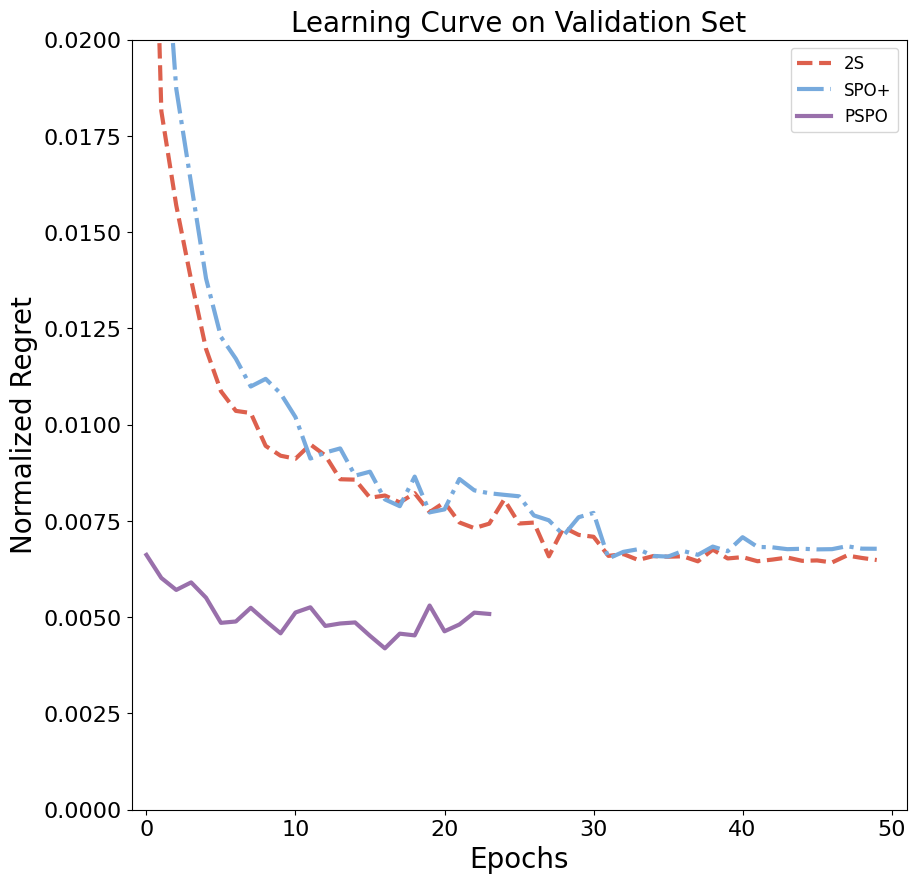

In [12]:
log_step=1
epochs=50
regret_log1=np.array(pd.read_csv('/content/drive/MyDrive/PSPO/18/TS_regret_log1.csv'))
regret_log2=np.array(pd.read_csv('/content/drive/MyDrive/PSPO/18/SPO_regret_log2.csv'))
regret_log3=np.array(pd.read_csv('/content/drive/MyDrive/PSPO/18/PSPO_regret_log3.csv'))

# colors
colors = ["#dd604d", "#77aadd","#9970ab"]
# drow learning curve on test set
fig = plt.figure(figsize=(10,10))
plt.plot([i*log_step for i in range(len(regret_log1))], regret_log1, color=colors[0], lw=3, ls="--", label="2S")
plt.plot([i*log_step for i in range(len(regret_log2))], regret_log2, color=colors[1], lw=3, ls="-.", label="SPO+", )
plt.plot([i*log_step for i in range(len(regret_log3))], regret_log3, color=colors[2], lw=3, ls="-", label="PSPO")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-1, epochs+1)
plt.ylim(0.0, 0.02)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Normalized Regret", fontsize=20)
plt.title("Learning Curve on Validation Set", fontsize=20)
plt.legend(fontsize=12)
plt.show()

In [13]:
df1=pd.read_csv('/content/drive/MyDrive/PSPO/18/TS_evaluate.csv')
df2=pd.read_csv('/content/drive/MyDrive/PSPO/18/SPO_evaluate.csv')
df3=pd.read_csv('/content/drive/MyDrive/PSPO/18/PSPO_evaluate.csv')

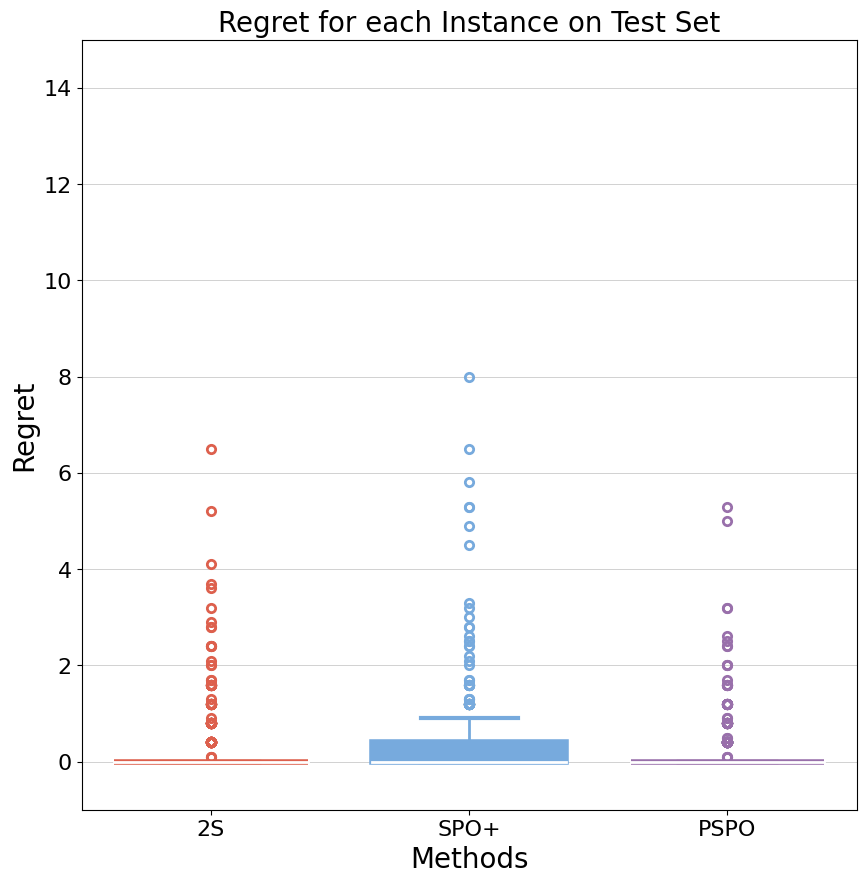

In [14]:
# draw boxplot of regret per instance
fig = plt.figure(figsize=(10,10))
boxplot_data = [df1["Regret"], df2["Regret"], df3["Regret"]]
bp = plt.boxplot(boxplot_data, medianprops=dict(color="dimgrey", linewidth=2), patch_artist=True, widths=0.75)
for i, patch in enumerate(bp["boxes"]):
    patch.set_facecolor(colors[i])
    patch.set_color(colors[i])
    patch.set_linewidth(4)
for i, patch in enumerate(bp["whiskers"]):
    patch.set_color(colors[i//2])
    patch.set_linewidth(2)
for i, patch in enumerate(bp["caps"]):
    patch.set_color(colors[i//2])
    patch.set_linewidth(3)
for i, patch in enumerate(bp["fliers"]):
    patch.set_marker("o")
    patch.set_markeredgecolor(colors[i])
    patch.set_markersize(6)
    patch.set_markeredgewidth(2)
for i, patch in enumerate(bp["medians"]):
    patch.set_color("w")
    patch.set_linewidth(2)
# grid
plt.grid(color="grey", alpha=0.5, linewidth=0.5, which="major", axis="y")
# labels and ticks
plt.xticks(ticks=range(1,4), fontsize=16, labels=["2S", "SPO+", "PSPO"])
plt.xlabel("Methods", fontsize=20)
plt.ylabel("Regret", fontsize=20)
plt.yticks(fontsize=16)
plt.xlim(0.5, 3.5)
plt.ylim(-1, 15)
plt.title("Regret for each Instance on Test Set", fontsize=20)
plt.show()

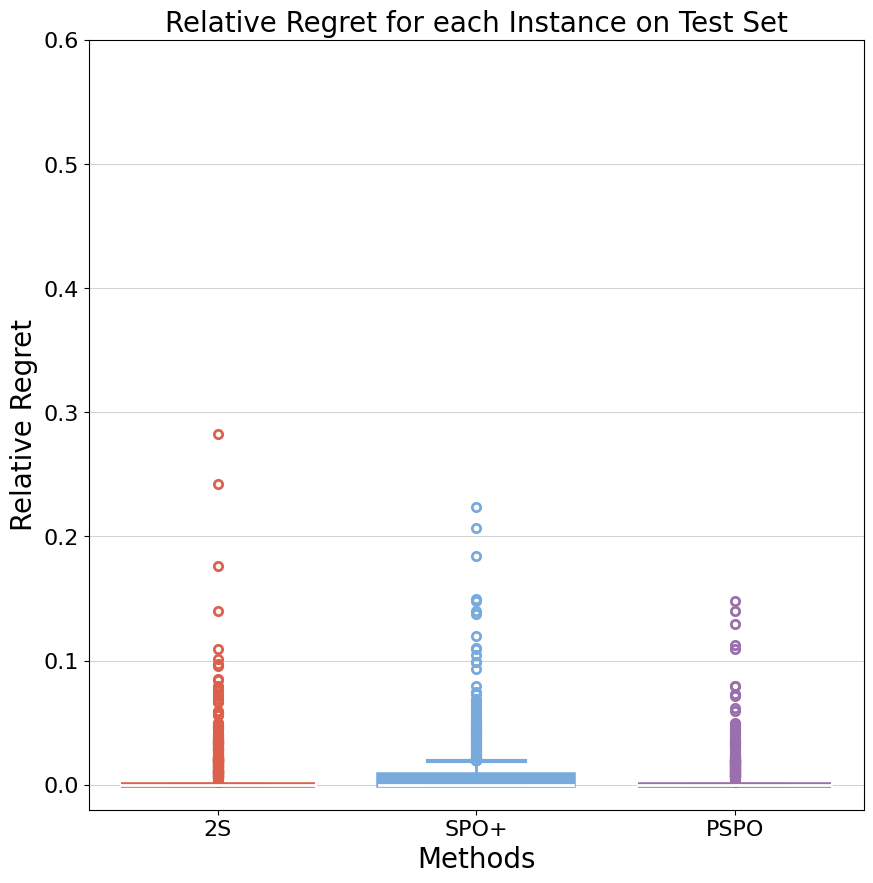

In [15]:
# draw boxplot of regret per instance
fig = plt.figure(figsize=(10,10))
boxplot_data = [df1["Relative Regret"], df2["Relative Regret"], df3["Relative Regret"]]
bp = plt.boxplot(boxplot_data, medianprops=dict(color="dimgrey", linewidth=2), patch_artist=True, widths=0.75)
for i, patch in enumerate(bp["boxes"]):
    patch.set_facecolor(colors[i])
    patch.set_color(colors[i])
    patch.set_linewidth(4)
for i, patch in enumerate(bp["whiskers"]):
    patch.set_color(colors[i//2])
    patch.set_linewidth(2)
for i, patch in enumerate(bp["caps"]):
    patch.set_color(colors[i//2])
    patch.set_linewidth(3)
for i, patch in enumerate(bp["fliers"]):
    patch.set_marker("o")
    patch.set_markeredgecolor(colors[i])
    patch.set_markersize(6)
    patch.set_markeredgewidth(2)
for i, patch in enumerate(bp["medians"]):
    patch.set_color("w")
    patch.set_linewidth(2)
# grid
plt.grid(color="grey", alpha=0.5, linewidth=0.5, which="major", axis="y")
# labels and ticks
plt.xticks(ticks=range(1,4), fontsize=16, labels=["2S", "SPO+", "PSPO"])
plt.xlabel("Methods", fontsize=20)
plt.ylabel("Relative Regret", fontsize=20)
plt.yticks(fontsize=16)
plt.xlim(0.5, 3.5)
plt.ylim(-0.02, 0.6)
plt.title("Relative Regret for each Instance on Test Set", fontsize=20)
plt.show()

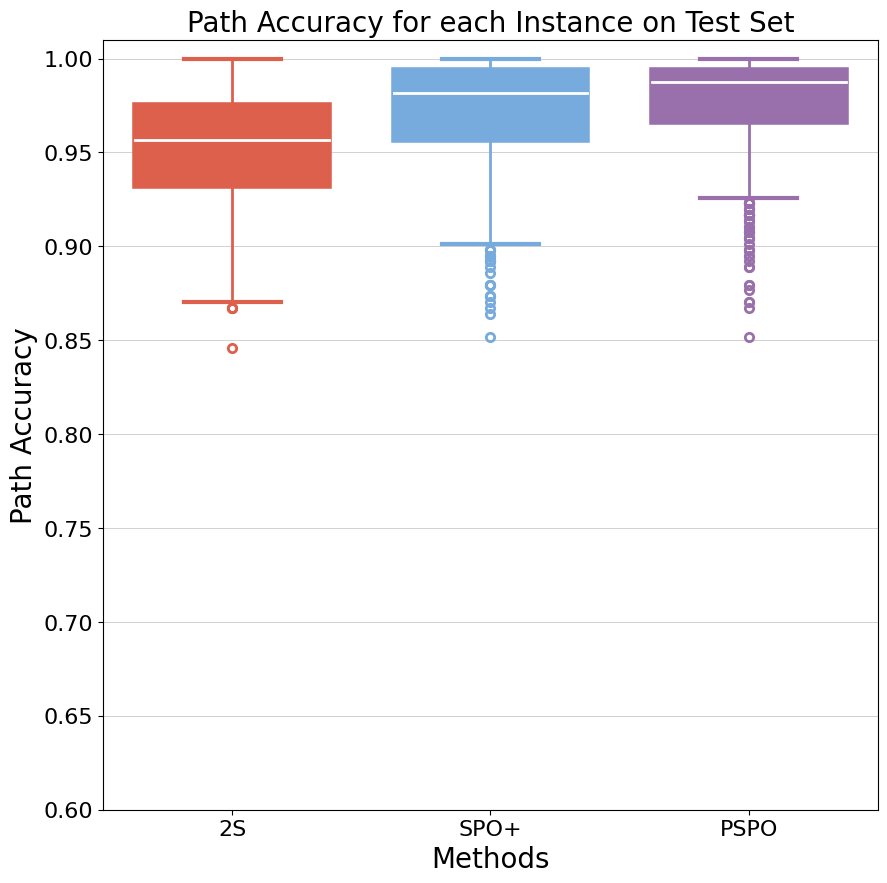

In [16]:
# draw boxplot of accuracy per instance
fig = plt.figure(figsize=(10,10))
boxplot_data = [df1["Accuracy"], df2["Accuracy"], df3["Accuracy"]]
bp = plt.boxplot(boxplot_data, medianprops=dict(color="dimgrey", linewidth=2), patch_artist=True, widths=0.75)
for i, patch in enumerate(bp["boxes"]):
    patch.set_facecolor(colors[i])
    patch.set_color(colors[i])
    patch.set_linewidth(4)
for i, patch in enumerate(bp["whiskers"]):
    patch.set_color(colors[i//2])
    patch.set_linewidth(2)
for i, patch in enumerate(bp["caps"]):
    patch.set_color(colors[i//2])
    patch.set_linewidth(3)
for i, patch in enumerate(bp["fliers"]):
    patch.set_marker("o")
    patch.set_markeredgecolor(colors[i])
    patch.set_markersize(6)
    patch.set_markeredgewidth(2)
for i, patch in enumerate(bp["medians"]):
    patch.set_color("w")
    patch.set_linewidth(2)
# grid
plt.grid(color="grey", alpha=0.5, linewidth=0.5, which="major", axis="y")
# labels and ticks
plt.xticks(ticks=range(1,4), fontsize=16, labels=["2S", "SPO+", "PSPO"])
plt.xlabel("Methods", fontsize=20)
plt.ylabel("Path Accuracy", fontsize=20)
plt.yticks(fontsize=16)
plt.xlim(0.5, 3.5)
plt.ylim(0.6, 1.01)
plt.title("Path Accuracy for each Instance on Test Set", fontsize=20)
plt.show()

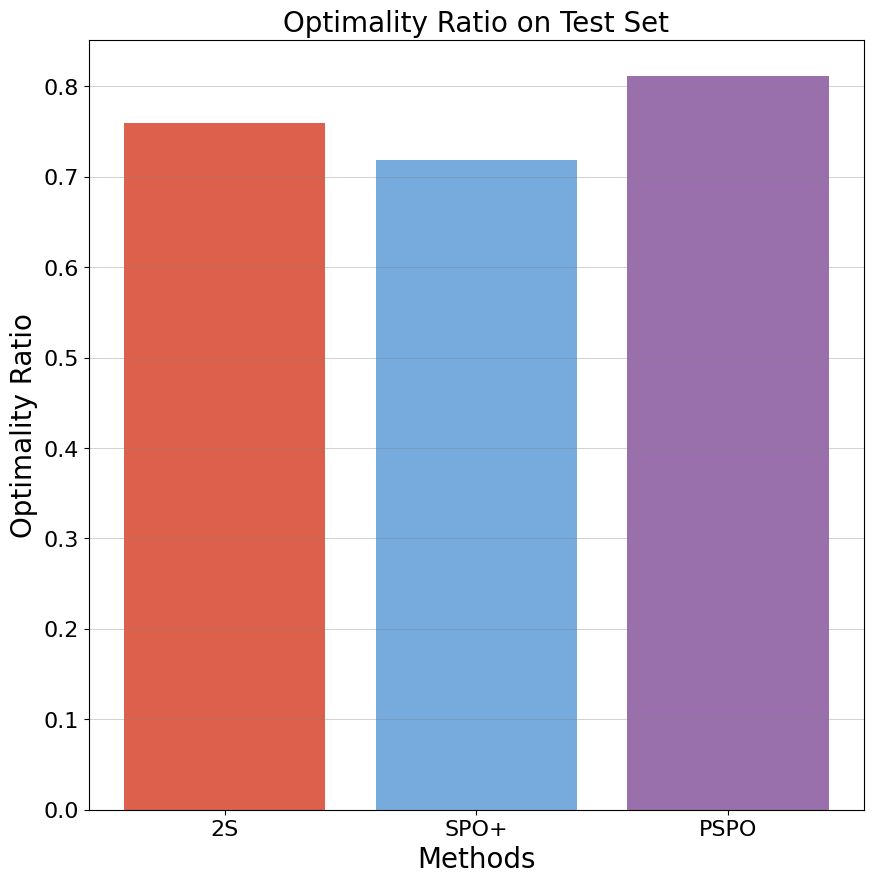

In [17]:
# draw barplot of optimality ratio per instance
fig = plt.figure(figsize=(10,10))
barplot_data = [df1["Optimal"].mean(), df2["Optimal"].mean(), df3["Optimal"].mean()]
bp = plt.bar(range(3), barplot_data, color=colors)
# grid
plt.grid(color="grey", alpha=0.5, linewidth=0.5, which="major", axis="y")
# labels and ticks
plt.xticks(ticks=range(3), fontsize=16, labels=["2S", "SPO+", "PSPO"])
plt.xlabel("Methods", fontsize=20)
plt.ylabel("Optimality Ratio", fontsize=20)
plt.yticks(fontsize=16)
plt.title("Optimality Ratio on Test Set", fontsize=20)
plt.show()

# 12 * 12

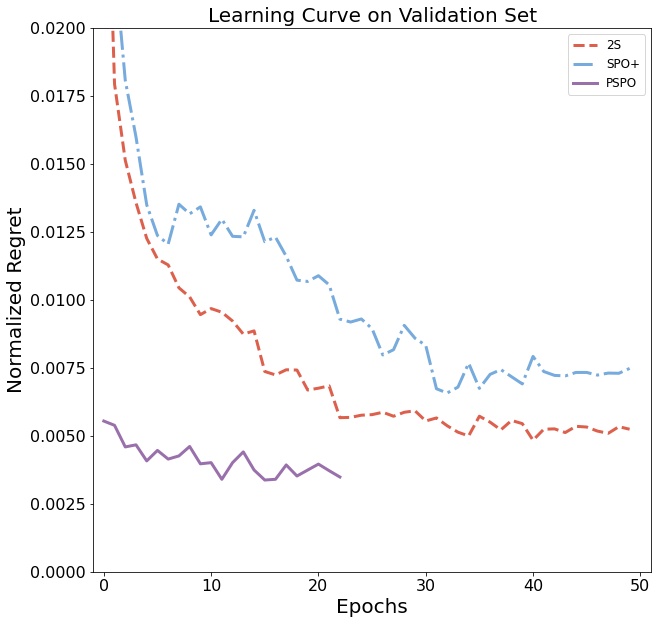

In [ ]:
log_step=1
epochs=50
regret_log1=np.array(pd.read_csv('/content/drive/MyDrive/PSPO/12/TS_regret_log1.csv'))
regret_log2=np.array(pd.read_csv('/content/drive/MyDrive/PSPO/12/SPO_regret_log2.csv'))
regret_log3=np.array(pd.read_csv('/content/drive/MyDrive/PSPO/12/PSPO_regret_log3.csv'))

# colors
colors = ["#dd604d", "#77aadd","#9970ab"]
# drow learning curve on test set
fig = plt.figure(figsize=(10,10))
plt.plot([i*log_step for i in range(len(regret_log1))], regret_log1, color=colors[0], lw=3, ls="--", label="2S")
plt.plot([i*log_step for i in range(len(regret_log2))], regret_log2, color=colors[1], lw=3, ls="-.", label="SPO+", )
plt.plot([i*log_step for i in range(len(regret_log3))], regret_log3, color=colors[2], lw=3, ls="-", label="PSPO")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-1, epochs+1)
plt.ylim(0.0, 0.02)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Normalized Regret", fontsize=20)
plt.title("Learning Curve on Validation Set", fontsize=20)
plt.legend(fontsize=12)
plt.show()

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/PSPO/12/TS_evaluate.csv')
df2=pd.read_csv('/content/drive/MyDrive/PSPO/12/SPO_evaluate.csv')
df3=pd.read_csv('/content/drive/MyDrive/PSPO/12/PSPO_evaluate.csv')

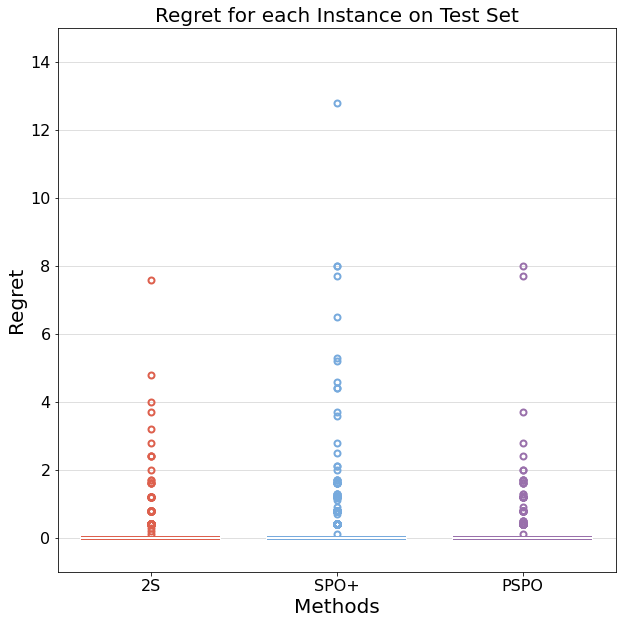

In [ ]:
# draw boxplot of regret per instance
fig = plt.figure(figsize=(10,10))
boxplot_data = [df1["Regret"], df2["Regret"], df3["Regret"]]
bp = plt.boxplot(boxplot_data, medianprops=dict(color="dimgrey", linewidth=2), patch_artist=True, widths=0.75)
for i, patch in enumerate(bp["boxes"]):
    patch.set_facecolor(colors[i])
    patch.set_color(colors[i])
    patch.set_linewidth(4)
for i, patch in enumerate(bp["whiskers"]):
    patch.set_color(colors[i//2])
    patch.set_linewidth(2)
for i, patch in enumerate(bp["caps"]):
    patch.set_color(colors[i//2])
    patch.set_linewidth(3)
for i, patch in enumerate(bp["fliers"]):
    patch.set_marker("o")
    patch.set_markeredgecolor(colors[i])
    patch.set_markersize(6)
    patch.set_markeredgewidth(2)
for i, patch in enumerate(bp["medians"]):
    patch.set_color("w")
    patch.set_linewidth(2)
# grid
plt.grid(color="grey", alpha=0.5, linewidth=0.5, which="major", axis="y")
# labels and ticks
plt.xticks(ticks=range(1,4), fontsize=16, labels=["2S", "SPO+", "PSPO"])
plt.xlabel("Methods", fontsize=20)
plt.ylabel("Regret", fontsize=20)
plt.yticks(fontsize=16)
plt.xlim(0.5, 3.5)
plt.ylim(-1, 15)
plt.title("Regret for each Instance on Test Set", fontsize=20)
plt.show()

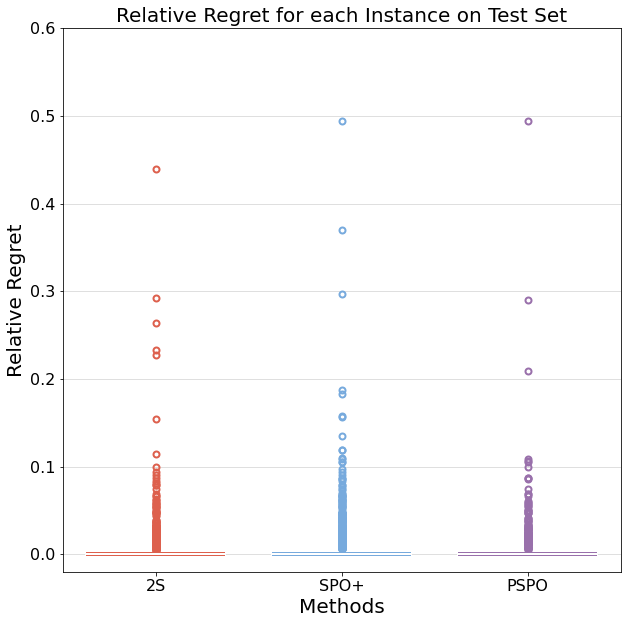

In [ ]:
# draw boxplot of regret per instance
fig = plt.figure(figsize=(10,10))
boxplot_data = [df1["Relative Regret"], df2["Relative Regret"], df3["Relative Regret"]]
bp = plt.boxplot(boxplot_data, medianprops=dict(color="dimgrey", linewidth=2), patch_artist=True, widths=0.75)
for i, patch in enumerate(bp["boxes"]):
    patch.set_facecolor(colors[i])
    patch.set_color(colors[i])
    patch.set_linewidth(4)
for i, patch in enumerate(bp["whiskers"]):
    patch.set_color(colors[i//2])
    patch.set_linewidth(2)
for i, patch in enumerate(bp["caps"]):
    patch.set_color(colors[i//2])
    patch.set_linewidth(3)
for i, patch in enumerate(bp["fliers"]):
    patch.set_marker("o")
    patch.set_markeredgecolor(colors[i])
    patch.set_markersize(6)
    patch.set_markeredgewidth(2)
for i, patch in enumerate(bp["medians"]):
    patch.set_color("w")
    patch.set_linewidth(2)
# grid
plt.grid(color="grey", alpha=0.5, linewidth=0.5, which="major", axis="y")
# labels and ticks
plt.xticks(ticks=range(1,4), fontsize=16, labels=["2S", "SPO+", "PSPO"])
plt.xlabel("Methods", fontsize=20)
plt.ylabel("Relative Regret", fontsize=20)
plt.yticks(fontsize=16)
plt.xlim(0.5, 3.5)
plt.ylim(-0.02, 0.6)
plt.title("Relative Regret for each Instance on Test Set", fontsize=20)
plt.show()

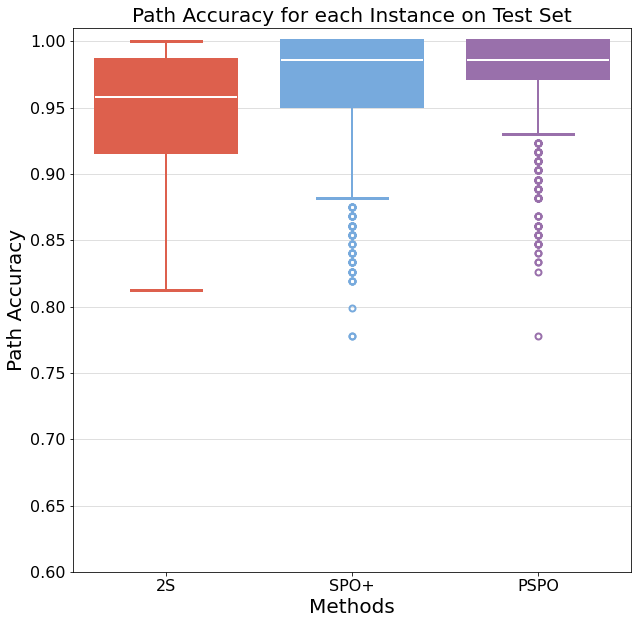

In [ ]:
# draw boxplot of accuracy per instance
fig = plt.figure(figsize=(10,10))
boxplot_data = [df1["Accuracy"], df2["Accuracy"], df3["Accuracy"]]
bp = plt.boxplot(boxplot_data, medianprops=dict(color="dimgrey", linewidth=2), patch_artist=True, widths=0.75)
for i, patch in enumerate(bp["boxes"]):
    patch.set_facecolor(colors[i])
    patch.set_color(colors[i])
    patch.set_linewidth(4)
for i, patch in enumerate(bp["whiskers"]):
    patch.set_color(colors[i//2])
    patch.set_linewidth(2)
for i, patch in enumerate(bp["caps"]):
    patch.set_color(colors[i//2])
    patch.set_linewidth(3)
for i, patch in enumerate(bp["fliers"]):
    patch.set_marker("o")
    patch.set_markeredgecolor(colors[i])
    patch.set_markersize(6)
    patch.set_markeredgewidth(2)
for i, patch in enumerate(bp["medians"]):
    patch.set_color("w")
    patch.set_linewidth(2)
# grid
plt.grid(color="grey", alpha=0.5, linewidth=0.5, which="major", axis="y")
# labels and ticks
plt.xticks(ticks=range(1,4), fontsize=16, labels=["2S", "SPO+", "PSPO"])
plt.xlabel("Methods", fontsize=20)
plt.ylabel("Path Accuracy", fontsize=20)
plt.yticks(fontsize=16)
plt.xlim(0.5, 3.5)
plt.ylim(0.6, 1.01)
plt.title("Path Accuracy for each Instance on Test Set", fontsize=20)
plt.show()

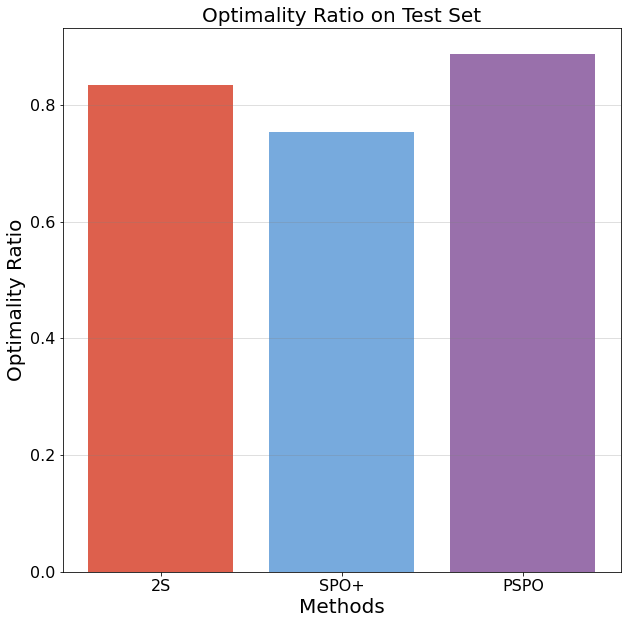

In [ ]:
# draw barplot of optimality ratio per instance
fig = plt.figure(figsize=(10,10))
barplot_data = [df1["Optimal"].mean(), df2["Optimal"].mean(), df3["Optimal"].mean()]
bp = plt.bar(range(3), barplot_data, color=colors)
# grid
plt.grid(color="grey", alpha=0.5, linewidth=0.5, which="major", axis="y")
# labels and ticks
plt.xticks(ticks=range(3), fontsize=16, labels=["2S", "SPO+", "PSPO"])
plt.xlabel("Methods", fontsize=20)
plt.ylabel("Optimality Ratio", fontsize=20)
plt.yticks(fontsize=16)
plt.title("Optimality Ratio on Test Set", fontsize=20)
plt.show()